<a href="https://colab.research.google.com/github/scanavi31/Ejercicio_Github/blob/main/Colab/NLP_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente: https://github.com/dan-almenar/Procesamiento-de-Lenguaje-Natural/tree/main

# Ejercicio de **NLP (Natural Language Processing)**


## Procesamiento de Lenguaje Natural: Pasos a seguir.

Se obtiene el texto con el cual se va a realizar el ejercicio. El cual se adjunta "Robin Hood.txt"

Una vez cargado el texto, se procede a:

1. ***Tokenizarlo*** (separarlo), tanto por palabras como por oraciones.
2. ***Reconocimiento de entidades***: identificar qué palabra o conjunto de palabras constituye una entidad (persona, lugar, organización).
3. ***Lematizarlo***: reducir cada palabra a su mínima expresión.
4. **POS Tagging**, es decir, asignarle a cada palabra su función gramatical (identificar cuáles son sustantivos, verbos, adjetivos y demás).
5. **Análisis de sentimiento** (determinar la actitud emocional expresada en un fragmento de texto).

Para este ejercicio, se utilizan tres de las principales librerías de Python para Procesamiento de Lenguaje Natural: **NLTK**, **SpaCy** y **Polyglot**, además de las herramientas tradicionales de análisis de datos como Pandas, Matplotlib, Numpy y Seaborn.

## Cargar la data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
robin_hood = open('/content/drive/MyDrive/Mentoría/Robin Hood.txt', 'r').read()

In [ ]:
robin_hood

'Se me callan. Si, sé que ha pasado mucho tiempo pero díganme una cosa, si Rihanna se ha tomado 5 años de algo que le DA REAL, ¿Yo no puedo descansar dos meses de esto? Para reflexionar. En fin, como los Backstreet Boys: omg I’m back again, y con la historia de Robin Hood. A ver, si hacen memoria, van a recordar que el “Robin Hood” de Disney es un zorro, y todos los personajes son animalitos del bosque. José Luis dirá: “Los zorros y los leones no tienen el mismo HÁBITAT, belen”. Tienes razón José Luis, pero estos animales son arquetipos, cállate. Esta decisión no fue simplemente una picada de culo de Disney. Sino que en verdad la película está basada en dos cosas: 1. Robin Hood (yo también estoy en shock) y 2. Renart el Zorro. Renart el zorro o Roman de Renart, son todo un conjunto de Fábulas francesas entre los siglos XII y XIII, que básicamente parodiaban las novelas épicas y generalmente tenían un tono bien sarcástico. O sea la gente antes de tener twitter, tenían las fábulas de Ren

 ## Tokenizado de oraciones y palabras:

Lo primero que haremos será tokenizar el texto en oraciones y en palabras.

Aunque parezca una tarea sencilla -podría argumentarse que donde haya un espacio termina una palabra, o donde haya un punto seguido de una palabra que comience en mayúscula indica el fin de una oración y el inicio de la siguiente-, la misma puede tener singularidades difíciles de codificar desde cero.

Tomemos, por ejemplo, la siguiente oración:

*El Sr. Ramírez ha visto un enjambre de abejas acercarse.*

Tenemos que Sr está seguida de un punto y Ramírez comienza en mayúscula. Aquí ya se cae el argumento que un punto seguido de una palabra que comienza en mayúscula marca el fin de una oración y el inicio de la siguiente.

Afortunadamente, la gran mayoría de las librerías  de Python para Procesamiento de Lenguaje Natural -por no decir todas-, cuenta con algoritmos lo suficientemente eficaces como para no cometer esos errores.

Para este ejercicio, utilizaremos NTLK ya que, si bien la librería *Polyglot*, relativamente más fácil de usar, cuenta con un algoritmo de tokenización, NLTK es una de las herramientas más antiguas con las que cuenta Python para el Procesamiento de Lenguaje Natural y, aunque quizás su implementación no es la más fácil para principiantes, cuenta con un soporte inmenso de usuarios y una documentación muy detallada.

 ### Importemos las librerías necesarias:

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

 Veamos cómo funciona la tokenización con un ejemplo sencillo:

In [ ]:
ejemplo = 'El Sr. Ramírez ha visto un enjambre de abejas acercarse. Asustado, corrió como nunca había corrido en su vida. Olvidó que corría directo al precipicio.'
tokenized_sentences = sent_tokenize(ejemplo)
tokenized_sentences

['El Sr. Ramírez ha visto un enjambre de abejas acercarse.',
 'Asustado, corrió como nunca había corrido en su vida.',
 'Olvidó que corría directo al precipicio.']

 Como se ve, *tokenized_sentences*, la variable en la que quedó guardada la tokenización de la frase de ejemplo, es una lista de oraciones.

 El tokenizado de palabras realiza el mismo procedimiento, con la diferencia de que devuelve una lista de palabras en lugar de oraciones:

In [ ]:
tokenized_words = word_tokenize(ejemplo)
tokenized_words[:10] #se muestran los primeros diez items

['El',
 'Sr.',
 'Ramírez',
 'ha',
 'visto',
 'un',
 'enjambre',
 'de',
 'abejas',
 'acercarse']

Arriba podemos ver que el método tokenize de la librería NLTK es lo suficientemente hábil como para entender que Sr. -con el punto- constituye una única palabra.

Repitamos ambas operaciones con el texto del hilo que estamos analizando:

In [ ]:
robin_hood_tk_sent = sent_tokenize(robin_hood)
robin_hood_tk_sent[:5] #se muestran las primeras cinco oraciones

['Se me callan.',
 'Si, sé que ha pasado mucho tiempo pero díganme una cosa, si Rihanna se ha tomado 5 años de algo que le DA REAL, ¿Yo no puedo descansar dos meses de esto?',
 'Para reflexionar.',
 'En fin, como los Backstreet Boys: omg I’m back again, y con la historia de Robin Hood.',
 'A ver, si hacen memoria, van a recordar que el “Robin Hood” de Disney es un zorro, y todos los personajes son animalitos del bosque.']

In [ ]:
robin_hood_tk_words = word_tokenize(robin_hood)
robin_hood_tk_words[:20] # se muestran los primeros veinte items

['Se',
 'me',
 'callan',
 '.',
 'Si',
 ',',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 ',',
 'si',
 'Rihanna',
 'se']

Lo primero que observamos al imprimir la lista tokenizada de palabras del hilo es que los signos de puntuación forman parte de la misma.

Filtremos la lista para reducirla únicamente a expresiones alfanuméricas. Para esto, haremos List Comprehension<sup>1</sup> sobre la lista robin_hood_tk_words aplicando el método *.isalnum()* y guardaremos el resultado en la misma variable, sobreescribiéndola:

---
<small><sup>1</sup> Si desean ahondar más sobre *List Comprehension*, tengo un tutorial en formato *Jupyter Notebook* [aquí](https://github.com/dan-almenar/Python-List-Comprehension-Tutorial).</small>

In [ ]:
robin_hood_tk_words = [word for word in robin_hood_tk_words if word.isalnum()]
robin_hood_tk_words[:20]

['Se',
 'me',
 'callan',
 'Si',
 'sé',
 'que',
 'ha',
 'pasado',
 'mucho',
 'tiempo',
 'pero',
 'díganme',
 'una',
 'cosa',
 'si',
 'Rihanna',
 'se',
 'ha',
 'tomado',
 '5']

 Mucho mejor.

 ## Reconocimiento de entidades (*Named Entities Recognition*):
Casi todas las herramientas de Procesamiento de Lenguaje Natural cuenta con algún algoritmo de reconocimiento de entidades. Esto es, un algoritmo que es capaz de encontrar en el texto palabras o conjunto de palabras que constituyen una entidad, sea una persona, una organización, un lugar, un nombre propio -marcas, nombres de libros o publicaciones, etc.- o incluso una referencia de geolocalización.

Para esta parte del ejercicio, usaré la librería ***spaCy***, quizás una de las librerías más completas y relativamente fáciles de implementar  de PLN para Python.

### Comenzaremos por instalar la librería y las dependencias necesarias:

In [ ]:
!pip install -U spacy

In [ ]:
%%bash
python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Importamos la librería y creamos un objeto de la clase Doc, pasando el texto del hilo bajo estudio:

In [ ]:
import spacy

nlp = spacy.load('es_core_news_lg')

doc = nlp(robin_hood)
type(doc)

spacy.tokens.doc.Doc

Como vemos, la variable *doc* es un objeto del tipo *spacy.tokens.doc.Doc*, que es la estructura principal de la librería *spaCy*.

Dicho objeto contiene nuestro texto ya tokenizado y sobre el cuál podemos operar de múltiples formas, pero recordemos que en este ejercicio nos estamos encargando específicamente del **reconocimiento de entidades**, las cuales podemos obtener haciendo una iteración sobre la variable *doc*, filtrando los tokens que hayan sido identificados como entidades del tipo *'MISC'*:

In [ ]:
robin_hood_entities = [(tok.text, tok.label_) for tok in doc.ents if tok.label_ != 'MISC']
robin_hood_entities

[('Rihanna', 'PER'),
 ('DA REAL', 'ORG'),
 ('¿Yo', 'ORG'),
 ('Backstreet Boys', 'ORG'),
 ('Robin Hood', 'PER'),
 ('Disney', 'PER'),
 ('José Luis', 'PER'),
 ('HÁBITAT', 'LOC'),
 ('belen', 'LOC'),
 ('José Luis', 'PER'),
 ('Disney', 'PER'),
 ('Roman de Renart', 'PER'),
 ('Disney', 'PER'),
 ('Robin Hood', 'PER'),
 ('Inglaterra', 'LOC'),
 ('Pedro Pérez', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('PERO', 'ORG'),
 ('Howard Pyle', 'PER'),
 ('CAPERUZA', 'ORG'),
 ('España', 'LOC'),
 ('Nottingham', 'LOC'),
 ('Inglaterra', 'LOC'),
 ('chevere', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('Robin', 'PER'),
 ('FORRESTLIFE', 'ORG'),
 ('Robin Hood', 'PER'),
 ('Robin', 'PER'),
 ('rey Richard', 'PER'),
 ('Nottingham', 'LOC'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER'),
 ('FORRESTLIFE', 'ORG'),
 ('Robin', 'PER'),
 ('Robin Hood', 'PER'),
 ('Robin Hood', 'PER')]

 Como vemos, el algoritmo ha cometido algunos errores -ningún algoritmo es 100% efectivo-. Por ejemplo, ha identificado TESTOSTERONA como un lugar (LOC), al igual que Sino (en Inglés [sino](https://en.m.wikipedia.org/wiki/Sino) es un prefijo que indica procedencia de China).

Llama la atención, sin embargo, que la palabra *'TESTOSTERONA'*, siendo que aparece dos veces -seguidas- en el texto del hilo, el algoritmo lo haya etiquetado como un lugar sólo en una de ellas, y le haya aplicado la etiqueta *MISC* en la otra oportunidad (sabemos que fue marcada como *misc* al no aparecer en el listado). Verifiquemos de igual modo:

In [ ]:
for tok in doc.ents:
    if 'TESTOSTERONA' in tok.text:
        print(tok.text, tok.label_)

Acá está la razón: el algoritmo ha identificado la expresión 'Esooo TESTOSTERONA' como una entidad y luego la repetición de la palabra 'TESTOSTERONA' como *otra* entidad.

Sin embargo, el algoritmo ha hecho un buen trabajo identificando nombres de personas. Veamos:

In [ ]:
for tok in doc.ents:
    if tok.label_ == 'PER':
        print(tok.text, tok.label_)

Rihanna PER
Robin Hood PER
Disney PER
José Luis PER
José Luis PER
Disney PER
Roman de Renart PER
Disney PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin PER
rey Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


De una simple lectura del resultado, podemos ver que *spaCy* *pareciera* haberse equivocado al identificar la palabra 'Ajá' como persona. Veamos si es efectivamente un error del algoritmo:

Primero busquemos en qué oración de las que tenemos tokenizadas aparece la palabra en cuestión:

In [ ]:
for sent in robin_hood_tk_sent:
    if 'Ajá' in sent:
        print(sent)

Ajá érase una vez en un lugar llamado Nottingham en Inglaterra, vivía un forajido/pran y su banda de forajidos con los que hacía vainas ilegales y de moral dudosa pero vainas ilegales y de moral dudosa que favorecían los intereses de la gente del bosque entonces, chevere pues.


 [Ajá](https://dle.rae.es/aj%C3%A1) es una interjección, y una regla del castellano es que las interjecciones que se incorporan a un enunciado deben ser separadas con comas. Sin embargo en este caso no está siendo incorporada a una oración, sino que la sola palabra es en si misma una unidad que ha debido ser escrita entre signos de exclamación.

Veamos si arreglando el enunciado el algoritmo de *spaCy* cambia también la entidad:

In [ ]:
aja = '¡Ajá! Érase una vez en un lugar llamado Nottingham en Inglaterra, vivía un forajido/pran y su banda de forajidos con los que hacía vainas ilegales y de moral dudosa pero vainas ilegales y de moral dudosa que favorecían los intereses de la gente del bosque entonces, chevere pues.'
aja_spacy = nlp(aja)
for tok in aja_spacy.ents:
    if 'Ajá' in tok.text:
        print(tok.text, tok.label_)

Al parecer no fue un error del algoritmo sino un error ortográfico. Recordemos que estos algoritmos siguen modelos prediseñados y a partir de ellos pueden arrojar conclusiones sobre la sintaxis y morfología de un texto, pero **no constituyen un repositorio del contenido total del lenguaje ni de las formas que éste puede adoptar** (lo cual sería un absurdo), y en consecuencia, un error en la sintaxis o en la morfología *puede llevar* a conclusiones erróneas.

En cualquier caso, no estamos evaluando acá el correcto uso del lenguaje de  @Bamtheory, más aún teniendo en cuenta que estamos analizando mensajes transmitidos a través de una plataforma en la que en muchísimos casos la sintaxis pasa a ocupar un segundo plano.

 De momento, retomemos el ejercicio y simplemente eliminemos '*Ajá*' de los resultados de personas en el reconocimiento de entidades:

In [ ]:
robin_hood_pers = [tok for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
for tok in robin_hood_pers:
    print(tok.text, tok.label_)

Rihanna PER
Robin Hood PER
Disney PER
José Luis PER
José Luis PER
Disney PER
Roman de Renart PER
Disney PER
Robin Hood PER
Pedro Pérez PER
Robin Hood PER
Robin Hood PER
Howard Pyle PER
Robin Hood PER
Robin PER
Robin PER
Robin PER
Robin PER
Robin Hood PER
Robin PER
rey Richard PER
Robin Hood PER
Robin Hood PER
Robin PER
Robin Hood PER
Robin Hood PER


 Veamos cuántas veces aparece cada entidad identificada como 'PER' (persona):

In [ ]:
from collections import Counter

robin_hood_names = [tok.text for tok in doc.ents if tok.label_ == 'PER' and 'Ajá' not in tok.text]
pers_counter = Counter(robin_hood_names)
pers_counter = list(reversed(pers_counter.most_common()))
pers_counter

[('rey Richard', 1),
 ('Howard Pyle', 1),
 ('Pedro Pérez', 1),
 ('Roman de Renart', 1),
 ('Rihanna', 1),
 ('José Luis', 2),
 ('Disney', 3),
 ('Robin', 6),
 ('Robin Hood', 10)]

 Separemos en dos listas separadas los nombres de la cantidad de repeticiones de cada uno:

In [ ]:
names = [name for name, count in pers_counter]
count = [count for name, count in pers_counter]

 Finalmente, importemos *matplotlib.pyplot* a nuestro proyecto y grafiquemos el resultado:

In [ ]:
import matplotlib.pyplot as plt

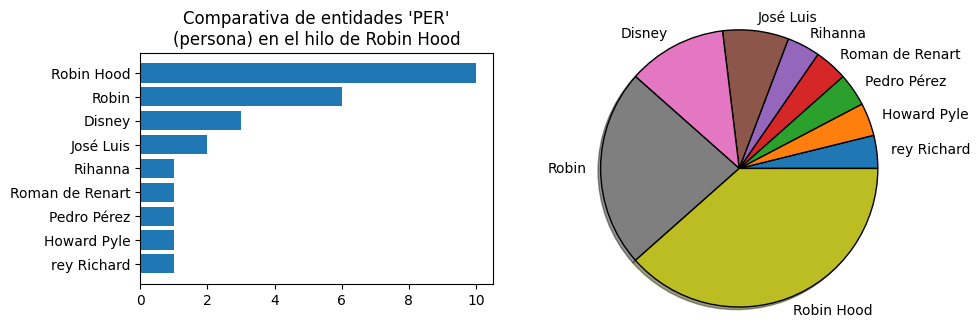

In [ ]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
barh = plt.barh(names, count)
plt.title('Comparativa de entidades \'PER\'\n(persona) en el hilo de Robin Hood')
plt.subplot(122)
pie = plt.pie(count, labels=names, wedgeprops={'edgecolor': 'black'},
              radius=1.5, shadow=True)
plt.style.use('fivethirtyeight')
plt.show()

Veamos un ejemplo de cómo podemos **representar gráficamente** la información contenida en la variable *doc* (recordemos que es un objeto de la clase Doc de spacy), mediante el método *displacy* de la librería:

In [ ]:
from spacy import displacy

displacy.render(doc, style='ent', jupyter=True)

In [ ]:
robin_hood_sents = list(doc.sents)
displacy.render(robin_hood_sents[3:5], style='dep', jupyter=True, options={'compact': True, 'color': 'white', 'bg': '#000000', 'distance': 100})

In [ ]:
 displacy.render(robin_hood_sents[16], style='dep', jupyter=True, options={'color': 'white', 'bg': '#7d227b', 'distance': 95})

## Part of Speech Tagging:

El siguiente paso será asignarle a cada palabra de la lista *robin_hood_tk_words* su función gramatical.

Para realizar este proceso -conocido como *Part of Speech Tagging (POS Tagging)*- utilizaré la librería *Polyglot*, por dos razones:
1. El soporte multilingual de *Polyglot* es muy robusto, y en nuestro caso estamos analizando no sólo un texto en español, sino que además cuenta con modismos propios del locutor.
2. *Polyglot* cuenta con un algoritmo de POS Tagging sumamente eficaz ya listo para utilizar, sin necesidad de ser entrenado por el usuario.

 ### Instalemos Polyglot (y sus dependencias) e importémoslo en nuestro proyecto:

In [ ]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install Morfessor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=52b3936e7f96cd50f54f9afdd0b53243b1205be4abc2bb0cb7ec9fa1733b4e6a
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
Successfully built polyglot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.4/262.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.13.1-cp310-cp310-linux_x86_64.whl size=1801403 sha256=c3a6d029f24429e2f16546970cd830efec5df3952140c3fda1d81495f8944c8b
  Stored in directory: /root/.cache/pip/wheels/8e/45/08/f4bc505e31eb7bb779d493226921abf18cf55ed30142e70eae
Successfully built pyicu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 25.0 MB/s et

In [ ]:
import polyglot
from polyglot.downloader import downloader
from polyglot.text import Text

Descarguemos también los archivos necesarios para esta tarea en particular:

In [ ]:
%%bash
polyglot download embeddings2.es pos2.es ner2.es

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package pos2.es to /root/polyglot_data...
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


Ya instalado *Polyglot* y todas sus dependencias pasemos, ahora sí, a realizar el *POS Tagging* del texto bajo estudio.

Al igual que *spaCy* tiene un tipo de objeto (Doc) en el que se realizan todas las operaciones de Procesamiento de Lenguaje Natural, *Polyglot* opera a través de objetos de tipo *Text*:

In [ ]:
text = Text(robin_hood)
type(text)

polyglot.text.Text

 Y, al igual que en *spaCy*, a partir de dicho objeto podemos ver todas las características del texto (tokenizado, entidades, POS Tags, etc.). En nuestro caso, recordemos que queremos acceder a las etiquetas POS:

In [ ]:
text.pos_tags[:20] #se muestran los primeros veinte items

[('Se', 'PRON'),
 ('me', 'PRON'),
 ('callan', 'VERB'),
 ('.', 'X'),
 ('Si', 'PROPN'),
 (',', 'PUNCT'),
 ('sé', 'VERB'),
 ('que', 'SCONJ'),
 ('ha', 'AUX'),
 ('pasado', 'VERB'),
 ('mucho', 'DET'),
 ('tiempo', 'NOUN'),
 ('pero', 'CONJ'),
 ('díganme', 'PUNCT'),
 ('una', 'DET'),
 ('cosa', 'NOUN'),
 (',', 'PUNCT'),
 ('si', 'SCONJ'),
 ('Rihanna', 'PROPN'),
 ('se', 'PRON')]

 Vemos, que ahora cada palabra cuenta con una etiqueta. En el caso particular de *Polytlog* las etiquetas corresponden al [Universal POS Tag](https://universaldependencies.org/docs/u/pos/index.html), que se reducen a las siguientes:
<ul>• ADJ: adjetivo.
• ADP: preposición.
• ADV: adverbio.
• AUX: verbo auxiliar.</ul>
<ul>• CONJ: conjunción.
• DET: artículo determinado.
• INTJ: interjección.
• NOUN: sustantivo.</ul>
<ul>• NUM: numeral.
• PART: partícula.
• PRON: pronombre.
• PROPN: pronombre personal.</ul>
<ul>• PUNCT: signos de puntuación.
• SCONJ: conjunción subordinada.
• SYM: símbolo.
<ul>• VERB: verbos.
• X: otros.</ul>

Existen otros sistemas, como las complejas [etiquetas EAGLE](https://www.cs.upc.edu/~nlp/tools/parole-sp.html), específicamente creadas para el castellano.

La idea de este ejercicio es **graficar las proporciones de cada etiqueta en el hilo de Robin Hood** y, si repitiésemos el ejercicio en cada uno de los hilos publicados por @Bamtheory, podríamos encontrar patrones de lenguaje y -en su caso- cómo dichos patrones inciden en la efectividad de los hilos (esto no es un ejercicio que vayamos a realizar, al menos de momento, pero no quería dejar de pasar la oportunidad para exponer uno de los usos que podemos darle al Procesamiento de Lenguaje Natural).

Lo siguiente que haré será eliminar del listado aquellos etiquetados como signos de puntuación, y -del resto- contar cuántas veces aparece cada pareja de (palabra, etiqueta) y agrupar ese resultado en una lista que incluya el total de dichas apariciones.

El resultado será una lista  que contendrá un tupple con tres valores: (palabra, etiqueta, cantidad de repeticiones) y dicho tupple aparecerá una sola vez en la lista.

Así, si al aplicar el *POS Tagging* una misma palabra fue etiquetada de manera distinta en diversas oportunidades, podremos verlo más fácilmente.

In [ ]:
robin_hood_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
robin_hood_tags_count = list(Counter(robin_hood_tags).most_common())
robin_hood_tags_count[:10] #se muestran los diez primeros ítems

[(('de', 'ADP'), 53),
 (('y', 'CONJ'), 36),
 (('que', 'SCONJ'), 29),
 (('a', 'ADP'), 29),
 (('.', 'X'), 28),
 (('Robin', 'PROPN'), 27),
 (('el', 'DET'), 24),
 (('un', 'DET'), 20),
 (('en', 'ADP'), 20),
 (('la', 'DET'), 19)]

El resultado anterior no debería sorprendernos. Evidentemente en cualquier texto las palabras que maś repeticiones tendrán serán los artículos, conectivos, y todo el resto de conjunto de palabras no añaden contenido sino estructura al mensaje.

Este cúmulo de palabras, conocidas como *stopwords* o *palabras vacías*, suelen ser separadas del texto al hacer ejercicios de Procesamiento de Lenguaje Natural.

De las tres herramientas mencionadas a lo largo de este trabajo, NLTK es la que cuenta con un robusto glosario de *stopwords* en varios idiomas, incluido el español.

Descarguemos el listado e incorporémoslo a nuestro ejercicio:

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('spanish')[:10] #se muestran los primeros diez items

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Como medida de precaución, agreguemos a la lista de *stopwords* los signos de puntuación:

In [ ]:
stop_words = set(stopwords.words('spanish'))
punctuation = ['.', ',', ';', ':', '¿', '?', '¡', '!']
for sign in punctuation:
    stop_words.add(sign)
'!' and '¿' in stop_words

True

Bien, hemos comprobado que '!' y '¿' fueron agregadas al set de *stop_words* con lo cual queda claro que todo el listado de signos de puntuación fue añadido correctamente.

Pasemos entonces a eliminar del texto del hilo todas aquellas palabras que formen parte del set de *stop_words* y volvamos a enumerar las POS Tags así como la cantidad de veces que aparece cada una, simplemente sobreescribiendo la variable *robin_hood_tags* elimando los *stop_words*

In [ ]:
robin_hood_tags = [(word, tag) for (word, tag) in text.pos_tags if tag !='PUNCT']
robin_hood_tags = [(word, tag) for (word, tag) in robin_hood_tags if word not in stop_words]
robin_hood_tags_count = list(Counter(robin_hood_tags).most_common())
robin_hood_tags_count[:10] #se muestran los diez primeros ítems

[(('Robin', 'PROPN'), 27),
 (('Hood', 'PROPN'), 19),
 (('Y', 'CONJ'), 8),
 (('rey', 'NOUN'), 6),
 (('dos', 'NUM'), 4),
 (('historia', 'NOUN'), 4),
 (('bosque', 'NOUN'), 4),
 (('vez', 'NOUN'), 4),
 (('así', 'ADV'), 4),
 (('años', 'NOUN'), 3)]

Con los datos obtenidos podemos hacer nuestros propios gráficos, sin limitarnos a las visualizaciones ofrecidas por cada módulo en particular.

Lógicamente, tendremos que enumerar las equiquetas obtenidas y cuántas veces se obtuvo cada una, al igual que hicimos anteriormente con las entidades identificadas como personas por *spaCy*:

In [ ]:
tags = []
for (word, tag) in robin_hood_tags:
    tags.append(tag)

tags_count = Counter(tags)
tags_count = list(reversed(tags_count.most_common()))
tags_count

[('SYM', 2),
 ('SCONJ', 6),
 ('PRON', 9),
 ('AUX', 10),
 ('CONJ', 12),
 ('ADP', 12),
 ('DET', 13),
 ('ADV', 30),
 ('NUM', 35),
 ('X', 37),
 ('ADJ', 38),
 ('PROPN', 107),
 ('VERB', 116),
 ('NOUN', 177)]

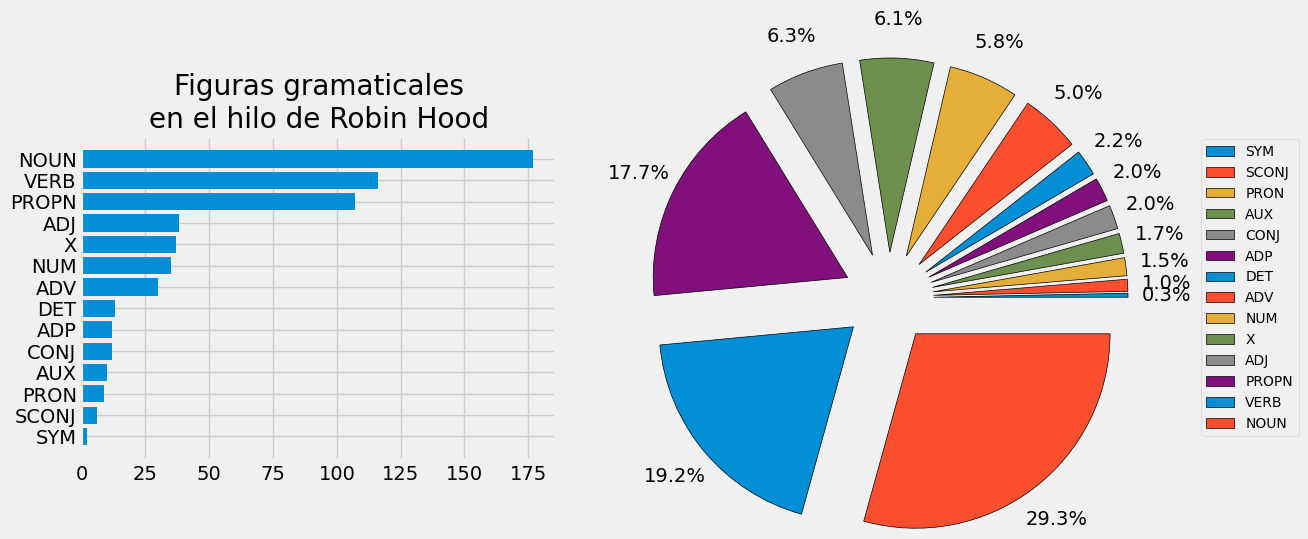

In [ ]:
labels = [tag for tag, value in tags_count]
values = [value for tag, value in tags_count]
explode = [value/value*0.35 for value in values]
plt.figure(figsize=(12, 4))
plt.subplot(121)
barh = plt.barh(labels, values)
plt.title('Figuras gramaticales\nen el hilo de Robin Hood')
plt.subplot(122)
pie = plt.pie(values, autopct='%1.1f%%',  pctdistance=1.2, wedgeprops={'edgecolor': 'black'},
              radius=1.5, explode=explode)
plt.legend(labels, loc='center right', bbox_to_anchor=(1.1,0.5), fontsize=10,
          bbox_transform=plt.gcf().transFigure)
plt.style.use('dark_background')
plt.show()

 ¿Recuerdan que en la aclaratoria les dije que el ejercicio se iba a tornar un poco redundante al utilizar varias librerías?

Bien, en este punto tenemos tres tokenizaciones (NLTK, *spaCy*, *Polyglot*), dos *NERs* y dos *POS Taggings* (*spaCy*, *Polyglot*). No está de más aclarar nuevamente que la intención de hacerlo así era mostrar un abanico de herramientas para que cada quien elija de entre ellas la que mejor le parezca según su propio proyecto.

Ya que las tenemos, aprovechemos de ver si existe alguna diferencia significativa entre el resultado de ambas librerías, en cuanto a *POS Tagging* se refiere:

In [ ]:
poly_tags = text.pos_tags
spacy_tags = [(token.text, token.pos_) for token in doc]

poly_tags == spacy_tags

False

De entrada vemos que ambas listas no son iguales, y por ello al compararlas (==) nos arroja como resultado *False*.

Veamos las diferencias entre los primeros cien ítems de cada lista:

In [ ]:
print('Polyglot tags:')
for tag in poly_tags[:100]:
    if tag not in spacy_tags[:100]:
        print(tag)
print(f'\nspaCy tags:')
for tag in spacy_tags[:100]:
    if tag not in poly_tags[:100]:
        print(tag)

Polyglot tags:
('.', 'X')
('Si', 'PROPN')
('pero', 'CONJ')
('díganme', 'PUNCT')
('DA', 'VERB')
('.', 'X')
('como', 'ADP')
('omg', 'X')
('back', 'X')
('y', 'CONJ')
('.', 'X')
('es', 'VERB')
('y', 'CONJ')
('son', 'VERB')
('animalitos', 'X')
('del', 'X')
('.', 'PROPN')
('dirá', 'PROPN')

spaCy tags:
('.', 'PUNCT')
('Si', 'SCONJ')
('pero', 'CCONJ')
('díganme', 'VERB')
('que', 'PRON')
('DA', 'PROPN')
('.', 'PUNCT')
('como', 'SCONJ')
('omg', 'PROPN')
('back', 'PROPN')
('y', 'CCONJ')
('.', 'PUNCT')
('es', 'AUX')
('y', 'CCONJ')
('son', 'AUX')
('animalitos', 'NOUN')
('del', 'ADP')
('.', 'PUNCT')
('dirá', 'VERB')


 Vemos que existe cierto grado de diferencia entre uno y otro resultado y de una vista rápida no podemos aseverar que una librería haya tenido mejor desempeño que la otra, ya que en algunos casos yerra *Polyglot* y en otros el error es de *spaCy*. Le corresponde al usuario en este caso determinar qué tipo de fallos o aciertos son más determinantes para la tarea que está realizando y -nuevamente- elejir de entre al abanico de opciones disponibles. Y recuerden que siempre está también la opción de elejir alguna de las librerías no mencionadas en este trabajo, o entrenar su propio modelo de *Machine Learning* para realizar la tarea.

En este particular y para este ejercicio, mi voto va para *spaCy*, ya que *Polyglot* ha hecho asignaciones erróneas en algunos verbos y sustantivos, que son una parte fundamental del lenguaje.

 ## Análisis de sentimiento:
Pasemos al último apartado de este ejercicio: el **análisis de sentimiento**. En resumen, el análisis de sentimiento consiste en asignar valores (típicamente positivo/negativo o positivo/neutro/negativo) a cada palabra de una oración, para posteriormente evaluar el resultado total de la misma.

El resultado será un número entre 0 y 1, el cual tendrá a positivo en la medida que se acerque a 1 y a negativo en caso contrario.

*Polyglot* cuenta con un algoritmo prediseñado para el análisis de sentimiento en español, no así *spaCy* ni NLTK, que tendría que ser creado por el usuario cargando previamente una data (un *corpus* de palabras previamente calibradas).

Además, vamos a traer acá una nueva librería nueva tanto para este ejercicio como en general, ya que fue creada en febrero de este año- dedicada exclusivamente al análisis de sentimiento de textos en español: ***sentiment-analysis-spanish***.

Comencemos por instalar esa librería y luego hagamos el ejercicio con las dos (*Polyglot*, y *sentiment-analysis-spanish*).

In [ ]:
!pip install sentiment-analysis-spanish

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 10.2 MB/s eta 0:00:00


 ### Comencemos con *Polyglot*:

*Polyglot* trabaja con un algoritmo de doble polaridad: positivo/negativo para cada **entidad**, al cual se accede mediante los métodos *positive_sentiment* y *negative_sentiment*.

Descarguemos los recursos necesarios y veamos los valores asignados a cada entidad reconocida como persona ('*I-PER*') por *Polyglot*:

In [ ]:
%%bash
polyglot download sentiment2.es

[polyglot_data] Downloading package sentiment2.es to
[polyglot_data]     /root/polyglot_data...


In [ ]:
robin_hood_poly_sentiment = []
for sentence in text.sentences:
    for ent in sentence.entities:
        if ent.tag == 'I-PER':
            try:
                positive = ent.positive_sentiment
                negative = ent.negative_sentiment
                entity_dict = {'entity': ent[0], 'positive': positive, 'negative': negative}
                robin_hood_poly_sentiment.append(entity_dict)
                #print(f'{ent} positive sentiment: {ent.positive_sentiment}, negative sentiment: {ent.negative_sentiment}')
            except:
                pass
robin_hood_poly_sentiment[:5] #se muestran los primeros cinco ítems

[{'entity': 'Rihanna', 'positive': 0, 'negative': 0.8918918918918919},
 {'entity': 'Robin', 'positive': 0.6666666666666667, 'negative': 0},
 {'entity': 'Robin', 'positive': 0.8548387096774194, 'negative': 0},
 {'entity': 'Robin', 'positive': 0, 'negative': 0.875},
 {'entity': 'Renart', 'positive': 0.6527777777777778, 'negative': 0}]

Como se ve, hemos creado la variable *robin_hood_poly_sentiment* que contiene una lista de diccionarios, cada uno con el nombre de la entidad, su polaridad positiva y negativa. Cada entidad aparece tantas veces como ha sido encontrada por *Polyglot*, ya que la polaridad específica de cada aparición depende de la polaridad de las palabras de la oración en la que se encuentra.

Convirtamos esa lista de diccionarios en un *dataframe* de *Pandas*:

In [ ]:
import pandas as pd

df_poly_sentiment = pd.DataFrame(robin_hood_poly_sentiment)
df_poly_sentiment.head()

,entity,positive,negative
0,Rihanna,0.000000,0.891892
1,Robin,0.666667,0.000000
2,Robin,0.854839,0.000000
3,Robin,0.000000,0.875000
4,Renart,0.652778,0.000000


Habiendo convertido la lista de diccionarios en un *dataframe* nos simplifica muchísimo la tarea de graficar el análisis de sentimiento de cada (*aparición de cada*) ente.

Hagamos un *scatter plot* con la data obtenida:

<ipython-input-45-5373eee34204>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


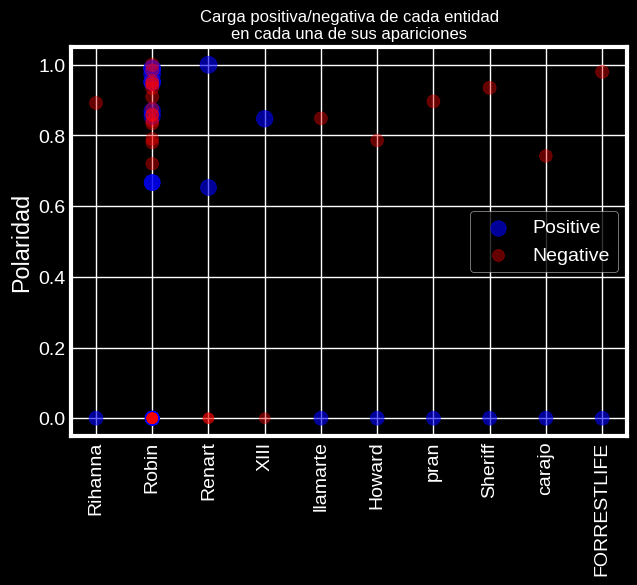

In [ ]:
plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['positive'], c='blue', s=(df_poly_sentiment['positive']+2)*50, alpha=0.6, label='Positive')
plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['negative'], c='red', s=(df_poly_sentiment['negative']+2)*30, alpha=0.4, label='Negative')
plt.legend(loc='center right')
plt.xticks(rotation=90)
plt.style.use('seaborn')
plt.ylabel('Polaridad')
plt.title('Carga positiva/negativa de cada entidad\nen cada una de sus apariciones')
plt.show()

 Unifiquemos las escalas restando al valor positivo el valor negativo obtenido en cada una, y guardemos ese resultado en otra columna del dataframe a la que llamaremos 'total'.

Mediante esta operación obtendremos un único resultado que irá de -1 a 1, el cual utilizaremos para hacer un nuevo gráfico de puntos.

In [ ]:
df_poly_sentiment['total'] = df_poly_sentiment['positive'] - df_poly_sentiment['negative']
df_poly_sentiment.head()

,entity,positive,negative,total
0,Rihanna,0.000000,0.891892,-0.891892
1,Robin,0.666667,0.000000,0.666667
2,Robin,0.854839,0.000000,0.854839
3,Robin,0.000000,0.875000,-0.875000
4,Renart,0.652778,0.000000,0.652778


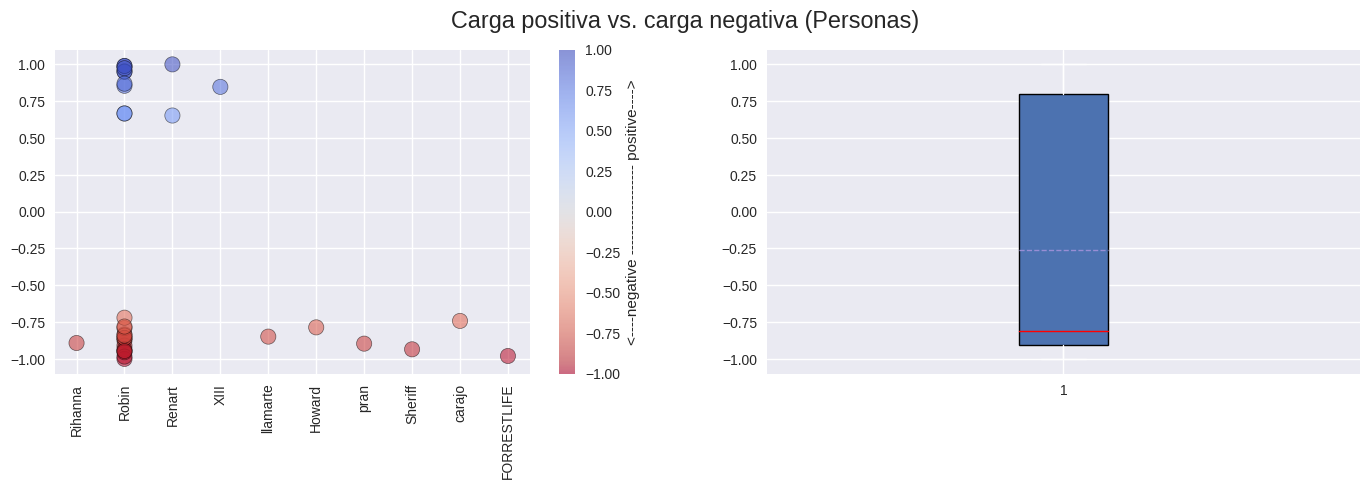

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
scatter = plt.scatter(df_poly_sentiment['entity'], df_poly_sentiment['total'],
                      c=df_poly_sentiment['total'], cmap='coolwarm_r', edgecolor='black',
                      linewidth=0.5, alpha=0.55, s=120)
cbar = plt.colorbar()
plt.xticks(rotation=90)
cbar.set_label('<----negative ------------------ positive---->')

plt.subplot(122)
boxplot  = plt.boxplot(df_poly_sentiment['total'], showmeans=True, meanline=True,
                       patch_artist=True, boxprops={'color': 'black'},
                       medianprops={'color': 'red'})
plt.suptitle('Carga positiva vs. carga negativa (Personas)')
plt.style.use('ggplot')
plt.show()

De los gráficos anteriores se evidencia que, al menos para el algoritmo de *Polyglot*, el texto del hilo de Robin Hood tiene una carga sentimental claramente negativa:
En el *scatter plot* (*izq.*) vemos lo siguiente:
1. Sólo tres de las personas identificadas por Polyglot han sido mencionadas en un contexto positivo. De esas tres personas una no lo es: el algoritmo etiquetó erróneamente XIII (siglo) como persona.
2. De las dos restantes, Robin acumula un buen número de menciones en contexto negativo, mucho más que las que ha sido nombrado en contexto positivo.
Por su parte, en el *boxplot* (*der.*) vemos que la línea media -en rojo- tiene un valor bajísimo, por debajo de -0.75.

Lo anterior no debe sorprendernos, ya que el texto del hilo está lleno de palabras a las que normalmente se le asigna una valoración negativa (*duelo, forajido, ladrón, robar, muerte*), por lo que el resultado era el esperado.

 ### Repitamos el ejercicio, esta vez con la librería ***sentiment-analysis-spanish***:

Esta librería, lanzada recientemente, tiene una implementación sumamente sencilla, que consiste básicamente en crear un objeto de la clase *SentimentAnalysisSpanish* y llamar al método *sentiment* de dicha clase, pasando cada oración como argumento (recordemos que las oraciones las tenemos ya tokenizadas en la variable *robin_hood_tk_sent*), lo que arrojará un valor entre 0 y 1, en el que a medida que el resultado tienda a cero o uno la oración tendrá, respectivamente, una carga negativa o positiva, y los valores centrales representarán oraciones de carga neutra:

In [ ]:
 from sentiment_analysis_spanish import sentiment_analysis

sentiment = sentiment_analysis.SentimentAnalysisSpanish()
sas_sentiment = []
for sentence in robin_hood_tk_sent:
    polarity = sentiment.sentiment(sentence)
    sas_sentiment.append(polarity)
sas_sentiment[:5] #se muestran los primeros cinco ítems

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[0.09000181786740202,
 6.487187616840355e-12,
 0.4513605618894927,
 0.0007511345965412985,
 0.0011175364332256443]

Finalmente, podemos representar graficamente la data obtenida:

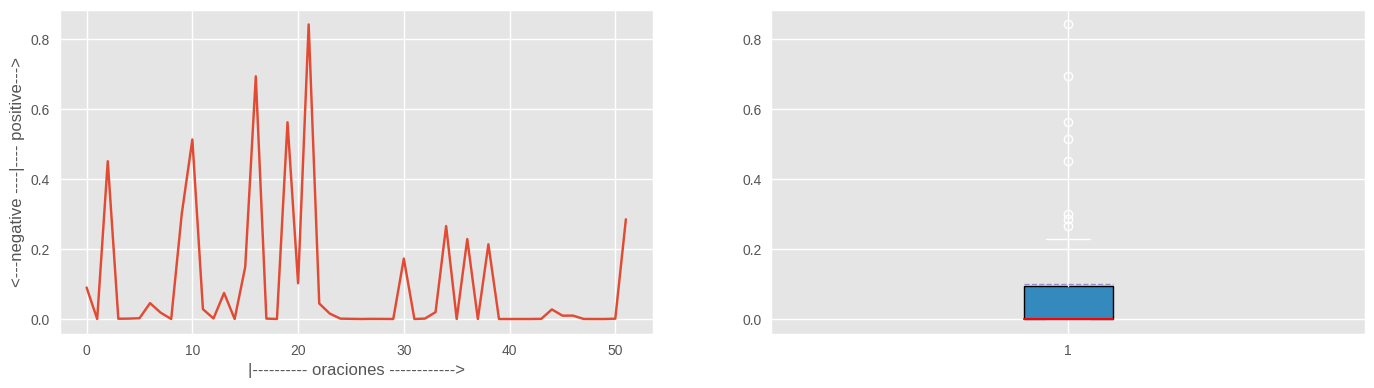

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plot = plt.plot(sas_sentiment)
plt.xlabel('|---------- oraciones ------------>')
plt.ylabel('<---negative ----|---- positive--->')

plt.subplot(122)
boxplot  = plt.boxplot(sas_sentiment, showmeans=True, meanline=True,
                       patch_artist=True, boxprops={'color': 'black'},
                       medianprops={'color': 'red', 'linewidth': 1.5})
plt.style.use('ggplot')
plt.show()

Aquí vemos cómo se repite el resultado esperado: un análisis de sentimiento que arroja una fuerte carga negativa con una media cercana a cero, apenas algunas desviaciones que concentran en una franja neutra y sólo dos oraciones que fueron valoradas como positivas por el algoritmo de *sentiment-analysis-spanish*.

### Y con esto hemos llegado al final de este ejercicio. Espero que les haya gustado y les haya sido de utilidad.
Gracias por leer. Por favor, compártelo si piensas que puede serle útil a alguien más.

Hasta pronto,

##Dan

##Sobre mi:
Soy un programador autodidacta de Buenos Aires (Argentina).

Hago tutoriales en varios formatos tanto en español como en inglés. Todos mis tutoriales son y serán siemnpre gratuitos. Si quieres apoyarme, puedes colaborar en cualquiera de estas dos plataformas:

• [Patreon](https://www.patreon.com/dandeveloper).

• [Ko-fi](https://ko-fi.com/dandev).